In [144]:
import pandas as pd
import numpy as np


In [145]:
df= pd.read_csv("dataset/bugs-2023-03-14 (3).csv")

In [146]:
dataset= pd.DataFrame(df)

In [147]:
dataset.head()

,Bug ID,Type,Summary,Product,Component,Assignee,Status,Resolution,Updated,Is Triaged,...,Priority,Severity,Assignee Real Name,Assignee Last Login Date,Closed,Change Request,Classification,Flags,Keywords,Regressions
0,357,defect,test -1,Bugzilla,Bugzilla-General,justdave@bugzilla.org,RESOLVED,INVALID,2012-12-18 20:46:19,No,...,P3,trivial,Dave Miller [:justdave],2023-03-06 00:00:00,2003-09-09 23:48:18,---,Server Software,NaN,NaN,NaN
1,541,defect,"Sorting the initial query by ""assignee"" doesn'...",Bugzilla,Bugzilla-General,terry@mozilla.org,RESOLVED,FIXED,2017-08-10 12:46:30,No,...,P2,normal,Terry Weissman,2017-03-20 00:00:00,2017-08-10 19:46:30,---,Server Software,NaN,NaN,NaN
2,554,enhancement,"Ought to have a ""show all recent activity"" query.",Bugzilla,Bugzilla-General,general@bugzilla.bugs,RESOLVED,WONTFIX,2014-08-08 06:54:05,No,...,--,normal,Nobody; OK to take it and work on it,NaN,2014-02-19 08:13:52,---,Server Software,NaN,NaN,NaN
3,2691,enhancement,Bogus test bug -- please ignore me.,Bugzilla,Bugzilla-General,bzbot@bugzilla.org,RESOLVED,INVALID,2012-12-18 20:46:19,No,...,P2,normal,bzbot on #mozwebtools,NaN,2001-11-10 16:42:23,---,Server Software,NaN,NaN,NaN
4,2900,task,PATCH to synchronize static html file with 'ba...,Bugzilla,Administration,justdave@bugzilla.org,RESOLVED,WONTFIX,2012-12-18 20:46:19,No,...,P3,normal,Dave Miller [:justdave],2023-03-06 00:00:00,2001-10-10 13:37:31,---,Server Software,NaN,NaN,NaN


In [148]:
dataset.isna().sum()

Bug ID                         0
Type                           0
Summary                        0
Product                        0
Component                      0
Assignee                       0
Status                         0
Resolution                     0
Updated                        0
Is Triaged                     0
Iteration                      0
Number of CC                   0
Opened                         0
Priority                       0
Severity                       8
Assignee Real Name            14
Assignee Last Login Date    1732
Closed                         0
Change Request                 0
Classification                 0
Flags                       6392
Keywords                    7835
Regressions                 8282
dtype: int64

In [149]:
dataset.drop(df.columns[[20, 21, 22]], axis=1, inplace=True)
dataset.head()

,Bug ID,Type,Summary,Product,Component,Assignee,Status,Resolution,Updated,Is Triaged,Iteration,Number of CC,Opened,Priority,Severity,Assignee Real Name,Assignee Last Login Date,Closed,Change Request,Classification
0,357,defect,test -1,Bugzilla,Bugzilla-General,justdave@bugzilla.org,RESOLVED,INVALID,2012-12-18 20:46:19,No,---,0,1998-05-16 00:02:59,P3,trivial,Dave Miller [:justdave],2023-03-06 00:00:00,2003-09-09 23:48:18,---,Server Software
1,541,defect,"Sorting the initial query by ""assignee"" doesn'...",Bugzilla,Bugzilla-General,terry@mozilla.org,RESOLVED,FIXED,2017-08-10 12:46:30,No,---,0,1998-08-27 13:08:45,P2,normal,Terry Weissman,2017-03-20 00:00:00,2017-08-10 19:46:30,---,Server Software
2,554,enhancement,"Ought to have a ""show all recent activity"" query.",Bugzilla,Bugzilla-General,general@bugzilla.bugs,RESOLVED,WONTFIX,2014-08-08 06:54:05,No,---,11,1998-08-31 16:17:50,--,normal,Nobody; OK to take it and work on it,NaN,2014-02-19 08:13:52,---,Server Software
3,2691,enhancement,Bogus test bug -- please ignore me.,Bugzilla,Bugzilla-General,bzbot@bugzilla.org,RESOLVED,INVALID,2012-12-18 20:46:19,No,---,0,1998-04-21 07:00:00,P2,normal,bzbot on #mozwebtools,NaN,2001-11-10 16:42:23,---,Server Software
4,2900,task,PATCH to synchronize static html file with 'ba...,Bugzilla,Administration,justdave@bugzilla.org,RESOLVED,WONTFIX,2012-12-18 20:46:19,No,---,3,1999-02-04 15:30:04,P3,normal,Dave Miller [:justdave],2023-03-06 00:00:00,2001-10-10 13:37:31,---,Server Software


In [150]:
datasets= dataset[(dataset.Resolution!="WONTFIX")& (dataset.Resolution!="INVALID")]
datasets.head()

,Bug ID,Type,Summary,Product,Component,Assignee,Status,Resolution,Updated,Is Triaged,Iteration,Number of CC,Opened,Priority,Severity,Assignee Real Name,Assignee Last Login Date,Closed,Change Request,Classification
1,541,defect,"Sorting the initial query by ""assignee"" doesn'...",Bugzilla,Bugzilla-General,terry@mozilla.org,RESOLVED,FIXED,2017-08-10 12:46:30,No,---,0,1998-08-27 13:08:45,P2,normal,Terry Weissman,2017-03-20 00:00:00,2017-08-10 19:46:30,---,Server Software
6,6944,defect,buglist: summary and whiteboard fight for space,Bugzilla,Bugzilla-General,Chris.Yeh@nokia.com,RESOLVED,FIXED,2012-12-18 20:46:19,No,---,1,1999-05-23 12:18:27,P3,major,Chris Yeh,NaN,2000-08-31 23:27:00,---,Server Software
7,7233,task,Editversions.cgi has a potential race resultin...,Bugzilla,Administration,LpSolit@gmail.com,RESOLVED,FIXED,2012-12-18 20:46:19,No,---,11,1999-05-27 12:50:28,P3,trivial,Frédéric Buclin,2023-02-22 00:00:00,2005-05-03 18:24:08,---,Server Software
8,7873,defect,duplicate isn't always resolved DUP when marki...,Bugzilla,Bugzilla-General,justdave@bugzilla.org,RESOLVED,FIXED,2012-12-18 20:46:20,No,---,5,1999-06-09 16:04:46,P2,critical,Dave Miller [:justdave],2023-03-06 00:00:00,2001-03-11 00:54:54,---,Server Software
9,9352,defect,bugs.version varchar(16) vs 64 and reserved wo...,Bugzilla,Bugzilla-General,tara@pixar.com,RESOLVED,FIXED,2012-12-18 20:46:20,No,---,7,1999-07-07 10:21:03,P2,normal,Tara Hernandez,NaN,2001-06-18 19:17:32,---,Server Software


In [151]:
datasets.shape

(6914, 20)

In [152]:
bugs= datasets.dropna()

In [153]:
bugs.shape

(6136, 20)

In [154]:
datasets.describe()

,Bug ID,Number of CC
count,6.914000e+03,6914.000000
mean,8.408838e+05,3.396442
std,5.251490e+05,4.030234
min,5.410000e+02,0.000000
25%,3.420682e+05,1.000000
50%,7.912125e+05,2.000000
75%,1.293607e+06,5.000000
max,1.821739e+06,111.000000


In [155]:
bugs.dtypes

Bug ID                       int64
Type                        object
Summary                     object
Product                     object
Component                   object
Assignee                    object
Status                      object
Resolution                  object
Updated                     object
Is Triaged                  object
Iteration                   object
Number of CC                 int64
Opened                      object
Priority                    object
Severity                    object
Assignee Real Name          object
Assignee Last Login Date    object
Closed                      object
Change Request              object
Classification              object
dtype: object

In [156]:
bugs['Assignee'].value_counts()

dkl@mozilla.com                  2082
LpSolit@gmail.com                 672
glob@mozilla.com                  555
mkanat@bugzilla.org               337
timeless@bemail.org               321
                                 ... 
gijskruitbosch+bugs@gmail.com       1
parkcra@gmail.com                   1
jshen@mozilla.com                   1
mbeltzner@gmail.com                 1
robbat2@gentoo.org                  1
Name: Assignee, Length: 150, dtype: int64

In [157]:
bugs['Product'].value_counts()

bugzilla.mozilla.org    3773
Bugzilla                2363
Name: Product, dtype: int64

In [158]:
bugs['Assignee'].value_counts()

dkl@mozilla.com                  2082
LpSolit@gmail.com                 672
glob@mozilla.com                  555
mkanat@bugzilla.org               337
timeless@bemail.org               321
                                 ... 
gijskruitbosch+bugs@gmail.com       1
parkcra@gmail.com                   1
jshen@mozilla.com                   1
mbeltzner@gmail.com                 1
robbat2@gentoo.org                  1
Name: Assignee, Length: 150, dtype: int64

In [159]:
bugs['Assignee Real Name'].value_counts()

David Lawrence [:dkl]                             2082
Frédéric Buclin                                    672
:glob ✱                                            555
Max Kanat-Alexander                                337
timeless                                           321
                                                  ... 
:Gijs (he/him)                                       1
Craig Parkinson                                      1
Jacob Shen                                           1
Mike Beltzner [:beltzner, not reading bugmail]       1
Robin H. Johnson [:robbat2]                          1
Name: Assignee Real Name, Length: 150, dtype: int64

In [160]:
bugs['Opened'] = pd.to_datetime(bugs['Opened'], format='%Y-%m-%d %H:%M:%S')
bugs['Closed'] = pd.to_datetime(bugs['Closed'], format='%Y-%m-%d %H:%M:%S')

C:\Users\hp\AppData\Local\Temp/ipykernel_14156/3406956740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bugs['Opened'] = pd.to_datetime(bugs['Opened'], format='%Y-%m-%d %H:%M:%S')
C:\Users\hp\AppData\Local\Temp/ipykernel_14156/3406956740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bugs['Closed'] = pd.to_datetime(bugs['Closed'], format='%Y-%m-%d %H:%M:%S')


In [161]:
bugs['Closed'].head()

1    2017-08-10 19:46:30
7    2005-05-03 18:24:08
8    2001-03-11 00:54:54
10   2005-11-21 04:04:43
11   2001-07-20 15:23:41
Name: Closed, dtype: datetime64[ns]

In [162]:
bugs['Opened'].head()

1    1998-08-27 13:08:45
7    1999-05-27 12:50:28
8    1999-06-09 16:04:46
10   1999-08-23 06:31:09
11   1999-08-30 15:21:20
Name: Opened, dtype: datetime64[ns]

In [163]:
bugs['diff_days'] = (bugs['Closed'] - bugs['Opened']) / np.timedelta64(1, 'D')
bugs['diff_days']=bugs['diff_days'].astype(int)
bugs['diff_days'].head()

C:\Users\hp\AppData\Local\Temp/ipykernel_14156/1038658346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bugs['diff_days'] = (bugs['Closed'] - bugs['Opened']) / np.timedelta64(1, 'D')
C:\Users\hp\AppData\Local\Temp/ipykernel_14156/1038658346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bugs['diff_days']=bugs['diff_days'].astype(int)


1     6923
7     2168
8      640
10    2281
11     690
Name: diff_days, dtype: int32

In [164]:
big=bugs
big['Severity'] = big['Severity'].replace(['S2', 'S3', 'major','critical','minor','trivial','normal',' --'], ['S2', 'S3', 'S1','S0','S3','S4','S2','S5'])
big['Severity'].value_counts()

C:\Users\hp\AppData\Local\Temp/ipykernel_14156/3111014764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big['Severity'] = big['Severity'].replace(['S2', 'S3', 'major','critical','minor','trivial','normal',' --','blocker'], ['S2', 'S3', 'S1','S0','S3','S4','S2','S5','S5'])


S2    4628
S5     703
S3     278
S1     235
S4     184
S0     108
Name: Severity, dtype: int64

In [165]:
bugs['days_diff_from_today'] = (pd.to_datetime('today')-bugs.Closed).dt.days
bugs['days_diff_from_today'].head()

C:\Users\hp\AppData\Local\Temp/ipykernel_14156/1608608276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bugs['days_diff_from_today'] = (pd.to_datetime('today')-bugs.Closed).dt.days


1     2085
7     6567
8     8081
10    6365
11    7950
Name: days_diff_from_today, dtype: int64

In [166]:
bugs['Severity'].value_counts()

S2    4628
S5     703
S3     278
S1     235
S4     184
S0     108
Name: Severity, dtype: int64

In [167]:
bugs.head()

,Bug ID,Type,Summary,Product,Component,Assignee,Status,Resolution,Updated,Is Triaged,...,Opened,Priority,Severity,Assignee Real Name,Assignee Last Login Date,Closed,Change Request,Classification,diff_days,days_diff_from_today
1,541,defect,"Sorting the initial query by ""assignee"" doesn'...",Bugzilla,Bugzilla-General,terry@mozilla.org,RESOLVED,FIXED,2017-08-10 12:46:30,No,...,1998-08-27 13:08:45,P2,S2,Terry Weissman,2017-03-20 00:00:00,2017-08-10 19:46:30,---,Server Software,6923,2085
7,7233,task,Editversions.cgi has a potential race resultin...,Bugzilla,Administration,LpSolit@gmail.com,RESOLVED,FIXED,2012-12-18 20:46:19,No,...,1999-05-27 12:50:28,P3,S4,Frédéric Buclin,2023-02-22 00:00:00,2005-05-03 18:24:08,---,Server Software,2168,6567
8,7873,defect,duplicate isn't always resolved DUP when marki...,Bugzilla,Bugzilla-General,justdave@bugzilla.org,RESOLVED,FIXED,2012-12-18 20:46:20,No,...,1999-06-09 16:04:46,P2,S0,Dave Miller [:justdave],2023-03-06 00:00:00,2001-03-11 00:54:54,---,Server Software,640,8081
10,12309,enhancement,Need to be able to choose all versions of an OS,Bugzilla,Bugzilla-General,mkanat@bugzilla.org,RESOLVED,FIXED,2017-02-03 12:26:56,No,...,1999-08-23 06:31:09,P4,S2,Max Kanat-Alexander,2013-11-14 08:00:00,2005-11-21 04:04:43,---,Server Software,2281,6365
11,12819,defect,Add/remove cc field to bulk change on bugs.,Bugzilla,Bugzilla-General,jacob@steenhagen.us,RESOLVED,FIXED,2017-02-03 12:33:22,No,...,1999-08-30 15:21:20,P2,S2,Jacob Steenhagen,2018-01-12 00:00:00,2001-07-20 15:23:41,---,Server Software,690,7950


In [168]:
from neo4j import GraphDatabase
import logging
from neo4j.exceptions import ServiceUnavailable

In [169]:
class App:
    
    def __init__(self, uri, user, password):
        self.driver = GraphDatabase.driver(uri, auth=(user, password))

    def close(self):
        # Don't forget to close the driver connection when you are finished with it
        self.driver.close()

    def create_friendship(self, bugId,types,product, component,status,resolution,assignee, priority,severity,classification,solving_time):
        with self.driver.session() as session:
            # Write transactions allow the driver to handle retries and transient errors
            result = session.write_transaction(
                self._create_and_return_friendship, bugId,types,product, component,status,resolution,assignee, priority,severity,classification,solving_time)
            for row in result:
                print("Created Node between: {p1}, {p2}".format(p1=row['p1'], p2=row['p2']))
           
          
    

    @staticmethod
    def _create_and_return_friendship(tx,bugId,types,product, component,status,resolution,assignee, priority,severity,classification,solving_time):
        # To learn more about the Cypher syntax, see https://neo4j.com/docs/cypher-manual/current/
        # The Reference Card is also a good resource for keywords https://neo4j.com/docs/cypher-refcard/current/
        query = (
            "MERGE (p1:bugId { name: $bugId }) "
            "MERGE (p2:types { name: $types }) "
            "MERGE (p3:product { name: $product }) "
            "MERGE (p4:component { name: $component }) "
            "MERGE (p5:status { name: $status }) "
            "MERGE (p6:resolution { name: $resolution }) "
            "MERGE (p7:assignee { name: $assignee }) "
            "MERGE (p8:priority { name: $priority }) "
            "MERGE (p9:severity{ name: $severity }) "
            "MERGE (p10:classification{ name: $classification }) "
            "MERGE (p11:solving_time{ name: $solving_time }) "
            
        )

        relationQuery=(
            "CREATE (p1)-[:isOftype]->(p2) "
            "CREATE (p1)-[:belongsToProduct]->(p3) "
            "CREATE (p1)-[:belongsToComponent]->(p4) "
            "CREATE (p1)-[:hasCurrentStatus]->(p5) "
            "CREATE (p1)-[:hasResolution]->(p6) "
            "CREATE (p1)-[:assignedTo]->(p7) "
            "CREATE (p1)-[:hasPriority]->(p8) "
            "CREATE (p1)-[:hasSeverity]->(p9) "
            "CREATE (p1)-[:isClassifiedTo]->(p10) "
            "CREATE (p1)-[:solvedin]->(p11) "
        )

        returnQueryVar="RETURN p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11"

        query+=relationQuery
        result = tx.run(query, bugId=bugId, types=types,product=product, component=component,status=status,resolution=resolution,assignee=assignee, priority=priority,severity=severity,classification=classification,solving_time=solving_time)
        query+=returnQueryVar
      
        
        try:
            return [{"p1": row["p1"]["name"], "p2": row["p2"]["name"]}
                    for row in result]
        # Capture any errors along with the query and data for traceability
        except ServiceUnavailable as exception:
            logging.error("{query} raised an error: \n {exception}".format(
                query=query, exception=exception))
            raise
        

    @staticmethod
    def _find_and_return_person(tx, person_name):
        query = (
            "MATCH (p:Person) "
            "WHERE p.name = $person_name "
            "RETURN p.name AS name"
        )
        result = tx.run(query, person_name=person_name)
        return [row["name"] for row in result]
    

built neo4j graph


In [170]:
# uri = "neo4j://localhost:7687"
# user = "neo4j"
# password = "EAFSDd8zrRrc66g"
# app = App(uri, user, password)
# for index, rows in bugs.iterrows():
#     bugId= str(rows['Bug ID'])
#     types= str(rows['Type'])
#     product= str(rows['Product'])
#     component= str(rows['Component'])
#     status= str(rows['Status'])
#     resolution= str(rows['Resolution'])
#     assignee= str(rows['Assignee'])
#     priority= str(rows['Priority'])
#     severity= str(rows['Severity'])
#     classification= str(rows['Classification'])
#     solving_time=str(rows['diff_days'])
#     print(bugId,types,product, component,status,resolution,assignee, priority,severity,classification,solving_time)
#     app.create_friendship( bugId,types,product, component,status,resolution,assignee, priority,severity,classification,solving_time)
# app.close()

Add decay_time node in graph

In [171]:
from neo4j import GraphDatabase
import pandas as pd

uri = "neo4j://localhost:7687"
user = "neo4j"
password = "EAFSDd8zrRrc66g"

driver = GraphDatabase.driver(uri, auth=(user, password))

# def add_decay_time_node(bugs_data):
#     with driver.session() as session:
#          # Create a node for decay_time
#         tx = session.begin_transaction()
#         query = "MERGE (d:decay_time { name: 'decay_time' }) RETURN d"
#         result = tx.run(query)
#         decay_time_node = result.single()[0]

#         # Add days_diff_from_today property to existing Bug ID nodes and create relationships with decay_time node
#         for index, bug in bugs_data.iterrows():
#             bugId = str(bug['Bug ID'])
#             days_diff_from_today = bug['days_diff_from_today']
#             tx.run("MATCH (b:bugId { name: $bugId }) SET b.days_diff_from_today = $days_diff_from_today", bugId=bugId, days_diff_from_today=days_diff_from_today)
#             tx.run("MATCH (b:bugId { name: $bugId }), (d:decay_time { name: 'decay_time' }) CREATE (b)-[r:decay_time { weight: $days_diff_from_today }]->(d)",bugId=bugId, days_diff_from_today=days_diff_from_today)

#         tx.commit()
#         return decay_time_node

# result = add_decay_time_node(bugs)
# print(result)


function for calculating decay factor

In [172]:
from neo4j import GraphDatabase
import math

uri = "neo4j://localhost:7687"
user = "neo4j"
password = "EAFSDd8zrRrc66g"

driver = GraphDatabase.driver(uri, auth=(user, password))

def calculate_decay_factor(tx, assignee, component):
    # Calculate the average solving time of bugs for this assignee and component
    avg_solving_time = tx.run("MATCH (a:assignee{name: $assignee})<-[:assignedTo]-(b:bugId)-[:belongsToComponent]->(c:component{name: $component}),(b)-[:solvedin]->(s:solving_time) "
                              "RETURN avg(toInteger(s.name)) AS avg_solving_time",
                              assignee=assignee, component=component).single()["avg_solving_time"]

    # Calculate the total decay factor for all bugs resolved by this assignee in this component
    total_decay_factor = 0
    result = tx.run("MATCH (a:assignee{name: $assignee})<-[:assignedTo]-(b:bugId)-[:belongsToComponent]->(c:component{name: $component}),(b)-[e:decay_time]->(d:decay_time) "
                    "RETURN e.weight AS days_diff_from_today",
                    assignee=assignee, component=component)
    for record in result:
        days_diff_from_today = record["days_diff_from_today"]
        if avg_solving_time == 0:
            decay_factor = 0
        else:
            decay_factor = math.exp(-days_diff_from_today / avg_solving_time)
        total_decay_factor += decay_factor

    # Print the average decay factor for this assignee in this component
    num_bugs = tx.run("MATCH (a:assignee{name: $assignee})<-[:assignedTo]-(b:bugId)-[:belongsToComponent]->(c:component{name: $component}) "
                      "RETURN count(b) AS num_bugs",
                      assignee=assignee, component=component).single()["num_bugs"]
    if num_bugs == 0:
        avg_decay_factor = 0
    else:
        avg_decay_factor = total_decay_factor / num_bugs
    if avg_decay_factor>0:
        print(f"assignee {assignee}, component {component}, Average Decay Factor {avg_decay_factor}")

with driver.session() as session:
    # Find all assignees and components
    assignees = session.run("MATCH (a:assignee) RETURN a.name AS assignee").values()
    components = session.run("MATCH (c:component) RETURN c.name AS component").values()

    # Calculate the decay factor for each assignee with each component
    for assignee in assignees:
        for component in components:
            session.read_transaction(calculate_decay_factor, assignee[0], component[0])


assignee fdonalisio@gmail.com, component Administration, Average Decay Factor 4.638457103869764e-161
assignee scabral@mozilla.com, component Administration, Average Decay Factor 9.57381410270486e-18
assignee mhoye@mozilla.com, component Administration, Average Decay Factor 0.00018146069925281392
assignee tschoening@am-soft.de, component Attachments & Requests, Average Decay Factor 1.520310024771829e-46
assignee lizhenry@gmail.com, component Administration, Average Decay Factor 7.664349650605748e-12
assignee quanah@zimbra.com, component Bug Import/Export & Moving, Average Decay Factor 2.4581379887760295e-08
assignee mcote@mozilla.bugs, component Bugzilla-General, Average Decay Factor 4.710832266159525e-11
assignee a9016009@gmx.de, component Bugzilla-General, Average Decay Factor 2.0166860938014574e-27
assignee charlie@charliesomerville.com, component Bugzilla-General, Average Decay Factor 7.290825426842204e-19
assignee steve@rkbb.co.uk, component Administration, Average Decay Factor 4.5

Build neo4j graph of assignee with their Bug_Resolution_Performance_Index and  their expertise score

In [173]:
# from neo4j import GraphDatabase

# uri = "neo4j://localhost:7687"
# user = "neo4j"
# password = "EAFSDd8zrRrc66g"

# driver = GraphDatabase.driver(uri, auth=(user, password))

# with driver.session() as session:
    # # Query to calculate expertise score
    # result = session.run(
    #     "MATCH (a:assignee)<-[:assignedTo]-(b:bugId)-[:belongsToComponent]->(c:component)\n"
    #     "WITH a, c, count(b) as bugsSolved\n"
    #     "MATCH (a)<-[:assignedTo]-(b:bugId)-[:belongsToComponent]->(c)\n"
    #     "WITH a, c, bugsSolved\n"
    #     "MATCH (a)<-[:assignedTo]-(b1:bugId)\n"
    #     "with a, count(distinct b1) as totalBug, c, bugsSolved\n"
    #     "RETURN a.name as assignee, c.name as component, bugsSolved, totalBug, toFloat(bugsSolved) / toFloat(totalBug) as expertiseScore\n"
    #     "order by a.name"
    # )
    
    # for record in result:
    #     assignee = record["assignee"]
    #     component = record["component"]
    #     expertise_score = record["expertiseScore"]
    #     # Create or merge assignee node
    #     session.run(
    #         "MERGE (a:Assignee {name: $assignee})",
    #         assignee=assignee
    #     )
    #     # Create or merge component node
    #     session.run(
    #         "MERGE (c:Component {name: $component})",
    #         component=component
    #     )

#         # Create or merge relationship between assignee and component nodes with expertise score as weight
#         session.run(
#             "MATCH (a:Assignee {name: $assignee}), (c:Component {name: $component}) "
#             "MERGE (a)-[r:EXPERTISE]->(c) "
#             "ON CREATE SET r.weight = $expertise_score "
#             "ON MATCH SET r.weight = $expertise_score",
#             assignee=assignee,
#             component=component,
#             expertise_score=expertise_score
#         )
    
    # Query to calculate Bug Resolution Performance Index
    # answer = session.run(
        # "MATCH (s1:solving_time)\n"
        # "WITH MAX(s1.name) AS max_time\n"
        # "MATCH (a:assignee)<-[:assignedTo]-(b:bugId)-[:solvedin]->(s:solving_time)\n"
        # "WITH a, toInteger(s.name) as solvingTime, max_time\n"
        # "WHERE solvingTime > 0\n"
        # "WITH a, avg(solvingTime) as avgResolutionTime,max_time\n"
        # "RETURN a.name as assignee,avgResolutionTime/toFloat(max_time) as Bug_Resolution_Performance_Index"
    # )
    
    # for record in answer:
    #     assignee = record["assignee"]
    #     Bug_Resolution_Performance_Index = record["Bug_Resolution_Performance_Index"]
        
    #     # Create or merge interaction trust node
    #     session.run(
    #         "MERGE (i:BugResolutionPerformanceIndex {name: 'BugResolutionPerformance'})",
    #     )
    #     session.run(
    #         "MATCH (a:Assignee {name: $assignee}), (i:BugResolutionPerformanceIndex {name: 'BugResolutionPerformanceIndex'}) "
    #         "MERGE (a)-[t:TRUST]->(i)"
    #         "ON CREATE SET t.weight = $Bug_Resolution_Performance_Index "
    #         "ON MATCH SET t.weight = $Bug_Resolution_Performance_Index",
    #         assignee=assignee,
    #         Bug_Resolution_Performance_Index=Bug_Resolution_Performance_Index
    #     )


In [191]:
import math
from neo4j import GraphDatabase
import csv

uri = "neo4j://localhost:7687"
user = "neo4j"
password = "EAFSDd8zrRrc66g"

driver = GraphDatabase.driver(uri, auth=(user, password))

# Define the calculate_decay_factor function
def calculate_decay_factor(tx, assignee, component):
    # Calculate the average solving time of bugs for this assignee and component
    avg_solving_time = tx.run("MATCH (a:assignee{name: $assignee})<-[:assignedTo]-(b:bugId)-[:belongsToComponent]->(c:component{name: $component}),(b)-[:solvedin]->(s:solving_time) "
                              "RETURN avg(toInteger(s.name)) AS avg_solving_time",
                              assignee=assignee, component=component).single()["avg_solving_time"]

    # Calculate the total decay factor for all bugs resolved by this assignee in this component
    total_decay_factor = 0
    result = tx.run("MATCH (a:assignee{name: $assignee})<-[:assignedTo]-(b:bugId)-[:belongsToComponent]->(c:component{name: $component}),(b)-[e:decay_time]->(d:decay_time) "
                    "RETURN e.weight AS days_diff_from_today",
                    assignee=assignee, component=component)
    for record in result:
        days_diff_from_today = record["days_diff_from_today"]
        if avg_solving_time == 0:
            decay_factor = 0
        else:
            decay_factor = math.exp(-days_diff_from_today / avg_solving_time)
        total_decay_factor += decay_factor

    # Calculate the average decay factor for this assignee in this component
    num_bugs = tx.run("MATCH (a:assignee{name: $assignee})<-[:assignedTo]-(b:bugId)-[:belongsToComponent]->(c:component{name: $component}) "
                      "RETURN count(b) AS num_bugs",
                      assignee=assignee, component=component).single()["num_bugs"]
    if num_bugs == 0:
        avg_decay_factor = 0
    else:
        avg_decay_factor = total_decay_factor / num_bugs

    return avg_decay_factor

# Define the calculate_expertise_score function
def calculate_expertise_score(tx, assignee, component):
    # Calculate the expertise score for this assignee
    result = tx.run("MATCH (a:Assignee{name: $assignee})-[e:EXPERTISE]->(c:Component{name: $component}) "
                    "RETURN e.weight AS expertise_score",
                    assignee=assignee, component=component).single()
    if result is None:
        return 0
    else:
        # print(result["expertise_score"])
        return result["expertise_score"]

# Define the calculate_interaction_trust function
def calculate_Bug_Resolution_Performance_Index(tx, assignee):
    result = tx.run("MATCH (a1:Assignee{name: $assignee})-[t:TRUST]->(i:BugResolutionPerformanceIndex) "
                    "RETURN (t.weight) AS Bug_Resolution_Performance_Index",
                    assignee=assignee).single()
    if result is None:
        return 0
    else:
        # print(result["interaction_trust"])
        return result["Bug_Resolution_Performance_Index"]

# Retrieve all assignees and their corresponding components from the database
with driver.session() as session:
    assignee_components = session.run("MATCH (a:assignee)<-[:assignedTo]-(b:bugId)-[:belongsToComponent]->(c:component) "
                                      "RETURN DISTINCT a.name AS assignee, c.name AS component").data()


with open('expertise_scores.csv', mode='w', newline='') as file:
    writer = csv.writer(file)

    # Write the header row
    writer.writerow(['Assignee', 'Component', 'credibility_score'])

    # Iterate over each assignee-component pair and calculate the weight
    for ac in assignee_components:
        assignee = ac["assignee"]
        component = ac["component"]
        decay_factor = calculate_decay_factor(session, assignee, component)
        Bug_Resolution_Performance_Index = calculate_Bug_Resolution_Performance_Index(session, assignee)
        expertise_score = calculate_expertise_score(session, assignee, component)
        credibility_score = 0.25 * Bug_Resolution_Performance_Index + 0.5 * expertise_score + 0.25 * decay_factor

        # Write the row to the CSV file
        writer.writerow([assignee, component, credibility_score])
    

community detection on assignee using decay factor, Bug_Resolution_Performance_Index and expertise score

In [174]:
import math
import networkx as nx
from neo4j import GraphDatabase
import community

uri = "neo4j://localhost:7687"
user = "neo4j"
password = "EAFSDd8zrRrc66g"

driver = GraphDatabase.driver(uri, auth=(user, password))

# Define the calculate_decay_factor function
def calculate_decay_factor(tx, assignee, component):
    # Calculate the average solving time of bugs for this assignee and component
    avg_solving_time = tx.run("MATCH (a:assignee{name: $assignee})<-[:assignedTo]-(b:bugId)-[:belongsToComponent]->(c:component{name: $component}),(b)-[:solvedin]->(s:solving_time) "
                              "RETURN avg(toInteger(s.name)) AS avg_solving_time",
                              assignee=assignee, component=component).single()["avg_solving_time"]

    # Calculate the total decay factor for all bugs resolved by this assignee in this component
    total_decay_factor = 0
    result = tx.run("MATCH (a:assignee{name: $assignee})<-[:assignedTo]-(b:bugId)-[:belongsToComponent]->(c:component{name: $component}),(b)-[e:decay_time]->(d:decay_time) "
                    "RETURN e.weight AS days_diff_from_today",
                    assignee=assignee, component=component)
    for record in result:
        days_diff_from_today = record["days_diff_from_today"]
        if avg_solving_time == 0:
            decay_factor = 0
        else:
            decay_factor = math.exp(-days_diff_from_today / avg_solving_time)
        total_decay_factor += decay_factor

    # Calculate the average decay factor for this assignee in this component
    num_bugs = tx.run("MATCH (a:assignee{name: $assignee})<-[:assignedTo]-(b:bugId)-[:belongsToComponent]->(c:component{name: $component}) "
                      "RETURN count(b) AS num_bugs",
                      assignee=assignee, component=component).single()["num_bugs"]
    if num_bugs == 0:
        avg_decay_factor = 0
    else:
        avg_decay_factor = total_decay_factor / num_bugs

    return avg_decay_factor

# Define the calculate_expertise_score function
def calculate_expertise_score(tx, assignee, component):
    # Calculate the expertise score for this assignee
    result = tx.run("MATCH (a:Assignee{name: $assignee})-[e:EXPERTISE]->(c:Component{name: $component}) "
                    "RETURN e.weight AS expertise_score",
                    assignee=assignee, component=component).single()
    if result is None:
        return 0
    else:
        # print(result["expertise_score"])
        return result["expertise_score"]

# Define the calculate_interaction_trust function
def calculate_Bug_Resolution_Performance_Index(tx, assignee):
    result = tx.run("MATCH (a1:Assignee{name: $assignee})-[t:TRUST]->(i:BugResolutionPerformanceIndex) "
                    "RETURN (t.weight) AS Bug_Resolution_Performance_Index",
                    assignee=assignee).single()
    if result is None:
        return 0
    else:
        # print(result["interaction_trust"])
        return result["Bug_Resolution_Performance_Index"]

# Retrieve all assignees and their corresponding components from the database
with driver.session() as session:
    assignee_components = session.run("MATCH (a:assignee)<-[:assignedTo]-(b:bugId)-[:belongsToComponent]->(c:component) "
                                      "RETURN DISTINCT a.name AS assignee, c.name AS component").data()

G_4 = nx.Graph()
# Create a weighted graph with assignees as nodes and the calculated weights as edges
for ac in assignee_components:
    assignee = ac["assignee"]
    component = ac["component"]
    G_4.add_node(assignee)

    # Calculate decay factor, interaction trust, and expertise score for this assignee
    decay_factor = calculate_decay_factor(session, assignee, component)
    Bug_Resolution_Performance_Index = calculate_Bug_Resolution_Performance_Index(session, assignee)
    expertise_score = calculate_expertise_score(session, assignee, component)
    weight = 0.5 * Bug_Resolution_Performance_Index + 0.25 * expertise_score + 0.25 * decay_factor
    G_4.add_edge(assignee, component, weight=weight)

# Apply the Louvain algorithm for community detection
partitions1 = community.best_partition(G_4)

# Assign the community ID as the node attribute for each assignee
for assignee in partitions1:
    G_4.nodes[assignee]["community"] = partitions1[assignee]
for assignee, community_id in partitions1.items():
    print(f"{assignee} belongs to community {community_id}")

kohei.yoshino@gmail.com belongs to community 4
Bug Creation/Editing belongs to community 4
dkl@mozilla.com belongs to community 3
glob@mozilla.com belongs to community 3
smujahid@mozilla.com belongs to community 4
philipp@bugzilla.kewis.ch belongs to community 4
ech@emmah.net belongs to community 3
dylan@hardison.net belongs to community 3
sebastinssanty@gmail.com belongs to community 4
gerv@mozilla.org belongs to community 0
Bugzilla-General belongs to community 0
justdave@bugzilla.org belongs to community 1
ka7@la-evento.com belongs to community 0
tomica@gmail.com belongs to community 0
dylan+test@hardison.net belongs to community 0
ektap.098@gmail.com belongs to community 0
sina@mashek.xyz belongs to community 0
emmanuel@seyman.fr belongs to community 0
usharma1998@gmail.com belongs to community 0
LpSolit@gmail.com belongs to community 1
altlist@gmail.com belongs to community 0
bugzilla@colinjoy.net belongs to community 0
a9016009@gmx.de belongs to community 0
selsky@columbia.edu be

In [175]:
# from pyvis.network import Network
# # Create a new pyvis network object
# nt = Network(height="750px", width="100%")
# # Assign colors to nodes based on their community
# colors = {0: "red", 1: "green", 2: "blue", 3: "orange",4:"yellow"}
# for assignee, community_id in partitions1.items():
#     if community_id not in colors:
#         colors[community_id] = plt.cm.tab20(community_id)
#     G_4.nodes[assignee]["color"] = colors[community_id]

# # Add edges between all members of a community
# for community_id in set(partitions1.values()):
#     members = [assignee for assignee, c_id in partitions1.items() if c_id == community_id]
#     for i in range(len(members)):
#         for j in range(i+1, len(members)):
#             G_4.add_edge(members[i], members[j])

# # Add nodes and edges to the pyvis network object
# for node in G_4.nodes():
#     color = G_4.nodes[node]["color"]
#     nt.add_node(node, color=color)
# for edge in G_4.edges():
#     nt.add_edge(edge[0], edge[1])
# nt.show_buttons(filter_=['physics'])
# nt.show("community.html")

Community detection using  Bug_Resolution_Performance_Index and expertise score

In [176]:
from neo4j import GraphDatabase
import community
import networkx as nx

uri = "neo4j://localhost:7687"
user = "neo4j"
password = "EAFSDd8zrRrc66g"

driver = GraphDatabase.driver(uri, auth=(user, password))

# Query to get assignees and their interaction trust and expertise score
query = """
MATCH (a:Assignee)-[t:TRUST]->(i:BugResolutionPerformanceIndex), (a)-[e:EXPERTISE]->(c:Component)
RETURN a.name AS assignee, t.weight AS Bug_Resolution_Performance_Index, e.weight AS expertise, c.name AS component
"""

with driver.session() as session:
    # Execute the query and store the results in a dictionary
    results = session.run(query)
    data_1 = {}
    for record in results:
        assignee = record["assignee"]
        Bug_Resolution_Performance_Index = record["Bug_Resolution_Performance_Index"]
        expertise = record["expertise"]
        component = record["component"]
        if assignee not in data_1:
            data_1[assignee] = {}
        data_1[assignee][component] = {"Bug_Resolution_Performance_Index":Bug_Resolution_Performance_Index, "expertise": expertise}

# Create a weighted graph using the data dictionary
G = nx.Graph()
for assignee in data_1:
    G.add_node(assignee)
    for component in data_1[assignee]:
        Bug_Resolution_Performance_Index = data_1[assignee][component]["Bug_Resolution_Performance_Index"]
        expertise = data_1[assignee][component]["expertise"]
        G.add_edge(assignee, component, weight=0.5*Bug_Resolution_Performance_Index+0.5*expertise)

# Run the Louvain algorithm for community detection
partition = community.best_partition(G, weight="weight")
# Print the community assignments
for assignee, community_id in partition.items():
    print(f"{assignee} belongs to community {community_id}")


mkanat@bugzilla.org belongs to community 0
Bug Import/Export & Moving belongs to community 1
Attachments & Requests belongs to community 2
Administration belongs to community 3
Bugzilla-General belongs to community 0
mcastelluccio@mozilla.com belongs to community 3
ryanvm@gmail.com belongs to community 3
smujahid@mozilla.com belongs to community 4
API belongs to community 4
Bug Creation/Editing belongs to community 4
cbook@mozilla.com belongs to community 3
michael.j.tosh@lmco.com belongs to community 3
aliustek@gmail.com belongs to community 1
rowebb@gmail.com belongs to community 0
ashish@mozilla.com belongs to community 3
jochen.wiedmann@gmail.com belongs to community 3
idl0r@gentoo.org belongs to community 3
eevee.mozilla@veekun.com belongs to community 1
gphemsley@gphemsley.org belongs to community 0
michaelc@wush.net belongs to community 0
gavin.sharp@gmail.com belongs to community 3
uokrent@gmail.com belongs to community 2
chtrom@gmail.com belongs to community 3
robbat2@gentoo.o

In [177]:
# from pyvis.network import Network
# # Create a new pyvis network object
# nt = Network(height="750px", width="100%")
# # Assign colors to nodes based on their community
# colors = {0: "red", 1: "green", 2: "blue", 3: "orange",4:"yellow"}
# for assignee, community_id in partition.items():
#     if community_id not in colors:
#         colors[community_id] = plt.cm.tab20(community_id)
#     G.nodes[assignee]["color"] = colors[community_id]

# # Add edges between all members of a community
# for community_id in set(partition.values()):
#     members = [assignee for assignee, c_id in partition.items() if c_id == community_id]
#     for i in range(len(members)):
#         for j in range(i+1, len(members)):
#             G.add_edge(members[i], members[j])

# # Add nodes and edges to the pyvis network object
# for node in G.nodes():
#     color = G.nodes[node]["color"]
#     nt.add_node(node, color=color)
# for edge in G.edges():
#     nt.add_edge(edge[0], edge[1])

# # Display the graph
# nt.show("example.html")

community detection on priority and severity

In [178]:
from neo4j import GraphDatabase
import community
import networkx as nx

uri = "neo4j://localhost:7687"
user = "neo4j"
password = "EAFSDd8zrRrc66g"



driver = GraphDatabase.driver(uri, auth=(user, password))

# Query Neo4j for bugs and their assignees, severity, and priority


with driver.session() as session:
    result = session.run("""
        MATCH (s:severity)<-[k:hasSeverity]-(b:bugId)-[:assignedTo]->(a:assignee),(p:priority)<-[h:hasPriority]-(b:bugId),(m:component)<-[:belongsToComponent]-(b:bugId)
        RETURN a.name AS assignee, AVG(0.4*s.weight +0.6* p.weight)/10 AS avg_weight, m.name as component
    """)
    data_2 = {}
    for record in result:
        assignee = record['assignee']
        avg_weight = record['avg_weight']
        component = record['component']
        # Store the average weight for this assignee in the dictionary
        if assignee not in data_2:
            data_2[assignee] = {}
        data_2[assignee][component] = avg_weight
G_2 = nx.Graph()

for assignee in data_2:
    G_2.add_node(assignee)
    for component in data_2[assignee]:
        w= data_2[assignee][component]
        G_2.add_edge(assignee,component,weight=w)

# Apply community detection using the Louvain algorithm
partition_p = community.best_partition(G_2, weight="weight")

# Print the communities
for assignee, community_id in partition_p.items():
    print(f"{assignee} belongs to community {community_id}")


kohei.yoshino@gmail.com belongs to community 1
Bug Creation/Editing belongs to community 1
Administration belongs to community 2
API belongs to community 1
dkl@mozilla.com belongs to community 1
Bugzilla-General belongs to community 3
Attachments & Requests belongs to community 4
glob@mozilla.com belongs to community 1
smujahid@mozilla.com belongs to community 5
philipp@bugzilla.kewis.ch belongs to community 6
ech@emmah.net belongs to community 1
dylan@hardison.net belongs to community 1
sebastinssanty@gmail.com belongs to community 1
gerv@mozilla.org belongs to community 4
Bug Import/Export & Moving belongs to community 7
justdave@bugzilla.org belongs to community 4
ka7@la-evento.com belongs to community 3
tomica@gmail.com belongs to community 3
dylan+test@hardison.net belongs to community 3
ektap.098@gmail.com belongs to community 3
sina@mashek.xyz belongs to community 3
emmanuel@seyman.fr belongs to community 2
usharma1998@gmail.com belongs to community 3
LpSolit@gmail.com belongs t

In [179]:
# from pyvis.network import Network
# net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")
# for node in G_2.nodes():
#     net.add_node(node, label=node, color=partition_p[node])
# for edge in G_2.edges():
#     net.add_edge(edge[0], edge[1])

# # Save and show the network
# net.show("community_graph.html")

In [180]:
from pyvis.network import Network
from matplotlib import pyplot as plt
# Create a new pyvis network object
nt = Network(height="750px", width="100%")
# Assign colors to nodes based on their community
colors = {0: "red", 1: "green", 2: "blue", 3: "orange",4:"yellow"}
for assignee, community_id in partition_p.items():
    if community_id not in colors:
        colors[community_id] = plt.cm.tab20(community_id)
    G_2.nodes[assignee]["color"] = colors[community_id]

# Add edges between all members of a community
for community_id in set(partition_p.values()):
    members = [assignee for assignee, c_id in partition_p.items() if c_id == community_id]
    for i in range(len(members)):
        for j in range(i+1, len(members)):
            G_2.add_edge(members[i], members[j])

# Add nodes and edges to the pyvis network object
for node in G_2.nodes():
    color = G_2.nodes[node]["color"]
    nt.add_node(node, color=color)
for edge in G_2.edges():
    nt.add_edge(edge[0], edge[1])
nt.show_buttons(filter_=['physics'])
# Display the graph
nt.show("assignee_piority_severity.html")


recommend  dev

In [181]:
# Define a function to find the community with the highest number of assignees who have expertise in the given component
def find_best_community(component,part,data):
    partition=part
    community_expertise_count = {}
    for assignee in data:
        if component in data[assignee]:
            community_id = partition[assignee]
            if community_id not in community_expertise_count:
                community_expertise_count[community_id] = 0
            community_expertise_count[community_id] += 1
    if community_expertise_count:
        return max(community_expertise_count, key=community_expertise_count.get)
    else:
        return None

# Define a function to calculate the total time taken to solve the issue for an assignee
def calculate_time(assignee, component,graph):
    G=graph
    shortest_path = nx.shortest_path(G, assignee, component, weight="weight")
    time = 0
    for i in range(len(shortest_path)-1):
        time += G[shortest_path[i]][shortest_path[i+1]]["weight"]
    return time

# Define a function to recommend the top 5 assignees for a given component
def recommend_assignee(component,graph,part,data):
    G=graph
    partition=part
    best_community = find_best_community(component,partition,data)
    print(best_community)
    if best_community is not None:
        best_assignees = []
        for assignee in data:
            if partition[assignee] == best_community and component in data[assignee]:
                time = calculate_time(assignee, component,G)
                best_assignees.append((assignee, time))
        best_assignees.sort(key=lambda x: x[1])
        return [assignee[0] for assignee in best_assignees]
    else:
        return []

In [182]:
# #using interaction trust,expertise score
# graph=G
# part=partition
# data=data_1
# result= recommend_assignee('Bugzilla-General',graph,part,data)
# result

In [183]:
#using priority and severity
graph=G_2
part=partition_p
data=data_2
d= recommend_assignee('Bugzilla-General',graph,part,data)
d

3


['gijskruitbosch+bugs@gmail.com',
 'michaelc@wush.net',
 'vitaly.fedrushkov@gmail.com',
 'bill+mozilla-bugzilla@bfccomputing.com',
 'ka7@la-evento.com',
 'tomica@gmail.com',
 'ektap.098@gmail.com',
 'sina@mashek.xyz',
 'bugzilla@colinjoy.net',
 'a9016009@gmx.de',
 'klibby@mozilla.com',
 'pami.ketolainen@gmail.com',
 'mtyson@mtyson.id.au',
 'emorley@mozilla.com',
 'charlie@charliesomerville.com',
 'rowebb@gmail.com',
 'bugspam.Callek@gmail.com',
 'john@redux.org.uk',
 'erh+mozilla@nimenees.com',
 'peterhenderson@byu.net',
 'reed@reedloden.com',
 'batosti@gmail.com',
 'wicked@sci.fi',
 'altlist@gmail.com',
 'shimono@bug-ja.org',
 'aliustek@gmail.com',
 'gphemsley@gphemsley.org',
 'dylan+test@hardison.net',
 'mcote@mozilla.bugs',
 'jeff.hedlund@matrixsi.com',
 'jacob@steenhagen.us',
 'dmosedale@mozilla.com',
 'nine@detonation.org',
 'terry@mozilla.org',
 'edwardjsabol@iname.com',
 'usharma1998@gmail.com',
 'bugzilla-mozilla@banoffee.co.uk']

In [184]:
from neo4j import GraphDatabase
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

uri = "neo4j://localhost:7687"
user = "neo4j"
password = "EAFSDd8zrRrc66g"



driver = GraphDatabase.driver(uri, auth=(user, password))

# Define the component and fetch the actual developers who resolved bugs for it
component = "Bugzilla-General"
with driver.session() as session:
    result = session.run(
        "MATCH (a:Assignee)-[:EXPERTISE]->(c:Component{name:$component}) "
        "RETURN DISTINCT a.name",
        component=component,
    )
    actual_devs = [record["a.name"] for record in result]

# Define the list of recommended developers for the component

# Calculate precision and recall
true_positives = len(set(d) & set(actual_devs))
false_positives = len(set(d) - set(actual_devs))
false_negatives = len(set(actual_devs) - set(d))
true_negatives = len(set(actual_devs).union(set(d))) - true_positives - false_positives - false_negatives

precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1=2*((precision*recall)/(precision+recall))
accuracy= (true_positives+true_negatives)/(true_negatives+true_positives+false_negatives+false_positives)

print(f"F1 score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
# ap = 0
# num_true_positives = 0
# for i, dev in enumerate(d):
#     if dev in actual_devs:
#         num_true_positives += 1
#         ap += num_true_positives / (i + 1)

# if num_true_positives == 0:
#     map = 0
# else:
#     # Calculate the Mean Average Precision (MAP)
#     map = ap / num_true_positives
# tpr = true_positives / (true_positives + false_negatives)  # True positive rate (sensitivity)
# fpr = false_positives / (true_negatives + false_positives)  # False positive rate (1 - specificity)
# auc_roc= tpr * (1 - fpr)

# print(f"tp: {true_positives}" )
# print(f"fp :{false_positives}" )
# print(f"fn:  {false_negatives}")
# print(f"tn: {true_negatives}")
# print(f"MAP: {map:.2f}")
# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"AUC-ROC: {auc_roc:.2f}")



F1 score: 0.64
Accuracy: 0.47


In [185]:
# Define a function to find the community with the highest number of assignees who have expertise in the given component
def find_best_community_1(component, partition, data):
    community_expertise_count = {}
    for assignee_component in data:
        assignee = assignee_component["assignee"]
        if assignee_component["component"] == component:
            community_id = partition[assignee]
            if community_id not in community_expertise_count:
                community_expertise_count[community_id] = 0
            community_expertise_count[community_id] += 1
    if community_expertise_count:
        return max(community_expertise_count, key=community_expertise_count.get)
    else:
        return None

# Define a function to calculate the total time taken to solve the issue for an assignee
def calculate_time_1(assignee, component, graph):
    G = graph
    shortest_path = nx.shortest_path(G, assignee, component, weight="weight")
    time = 0
    for i in range(len(shortest_path)-1):
        time += G[shortest_path[i]][shortest_path[i+1]]["weight"]
    return time

# Define a function to recommend the top 5 assignees for a given component
def recommend_assignee_1(component, graph, partition):
    G = graph
    recommended_assignees = []
    for ac in assignee_components:
        assignee = ac["assignee"]
        component = ac["component"]
        best_community = find_best_community_1(component, partition, assignee_components)
        if best_community is not None:
            if partition[assignee] == best_community:
                time = calculate_time_1(assignee, component, G)
                recommended_assignees.append((assignee, time))
    recommended_assignees.sort(key=lambda x: x[1])
    print(best_community)
    return [assignee[0] for assignee in recommended_assignees]

In [186]:
##using interaction trust,expertise score  and decay_factor
graph=G_4
part=partitions1
data=assignee_components
devs= recommend_assignee_1('Bugzilla-General',graph,part)
devs

4


['sebastinssanty@gmail.com',
 'jayvdb@gmail.com',
 'justdave@bugzilla.org',
 'mozilla+bmo@cso.me.uk',
 'bbaetz@gmail.com',
 'pami.ketolainen@gmail.com',
 'wurblzap@gmail.com',
 'sebastinssanty@gmail.com',
 'bugzilla-mozilla@vitters.nl',
 'madueme.israel@gmail.com',
 'dkl@mozilla.com',
 'altlist@gmail.com',
 'kiko@async.com.br',
 'mtyson@mtyson.id.au',
 'aliustek@gmail.com',
 'mkanat@bugzilla.org',
 'dylan@hardison.net',
 'gerv@mozilla.org',
 'robzilla2@siklos.ca',
 'batosti@gmail.com',
 'Tomas.Kopal@altap.cz',
 'emorley@mozilla.com',
 'mcote@mozilla.bugs',
 'LpSolit@gmail.com',
 'bugreport@peshkin.net',
 'glob@mozilla.com',
 'jacob@steenhagen.us',
 'myk@mykzilla.org',
 'kohei.yoshino@gmail.com',
 'burnus@gmx.de',
 'timeless@bemail.org',
 'nbezzala@yahoo.com',
 'ech@emmah.net',
 'kohei.yoshino@gmail.com',
 'sina@mashek.xyz',
 'jcristau@mozilla.com',
 'kairo@kairo.at',
 'mkmelin+mozilla@iki.fi',
 'ludovic@hirlimann.net',
 'nli@mozilla.com',
 'kevin+bugzilla@grandon.org',
 'coopcoopbware@

In [187]:
from neo4j import GraphDatabase
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, accuracy_score

uri = "neo4j://localhost:7687"
user = "neo4j"
password = "EAFSDd8zrRrc66g"



driver = GraphDatabase.driver(uri, auth=(user, password))

# Define the component and fetch the actual developers who resolved bugs for it
component = "Bugzilla-General"
with driver.session() as session:
    result = session.run(
        "MATCH (a:Assignee)-[:EXPERTISE]->(c:Component{name:$component}) "
        "RETURN DISTINCT a.name",
        component=component,
    )
    actual_devs = [record["a.name"] for record in result]

# Define the list of recommended developers for the component

# Calculate precision and recall
true_positives = len(set(devs) & set(actual_devs))
false_positives = len(set(devs) - set(actual_devs))
false_negatives = len(set(actual_devs) - set(devs))
true_negatives = len(set(actual_devs).union(set(devs))) - true_positives - false_positives - false_negatives
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1=2*((precision*recall)/(precision+recall))
accuracy= (true_positives+true_negatives)/(true_negatives+true_positives+false_negatives+false_positives)
print(f"F1 score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

F1 score: 0.68
Accuracy: 0.52


In [188]:
import networkx as nx
from networkx.algorithms import community
from networkx.algorithms.community import quality
communities = {}
for email, label in partitions1.items():
    if label not in communities:
        communities[label] = set()
    communities[label].add(email)
partition = list(communities.values())

modularity = quality.partition_quality(G_4, partition)
print(f"Modularity: {modularity}")
# cut, assoc, conductance_value = metis.part_graph(partition, G_4)
# print(f"Conductance: {conductance_value}")
coverage = quality.coverage(G_4, partition)
# normalized_cut = quality.normalized_cut_size(G_4, partition)
# print(f"Conductance: {conductance}")
print(f"Coverage: {coverage}")
# print(f"Normalized Cut: {normalized_cut}")

Modularity: (0.583969465648855, 0.6948717948717948)
Coverage: 0.583969465648855


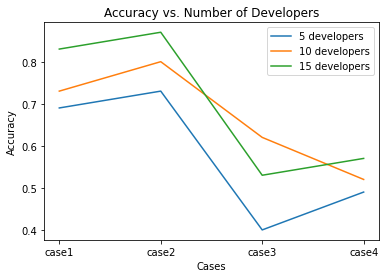

In [195]:
import matplotlib.pyplot as plt

# data for x-axis and y-axis
x = ['case1', 'case2', 'case3', 'case4']
# y1 = [accuracy_25_5_25_20,accuracy_2_6_2_20, accuracy_3_4_3_20, accuracy_3_3_4_20] # accuracy for 5 developers
# y2 = [accuracy_25_5_25_10,accuracy_2_6_2_10, accuracy_3_4_3_10, accuracy_3_3_4_10] # accuracy for 10 developers
# y3 = [accuracy_25_5_25_30, accuracy_2_6_2_30, accuracy_3_4_3_30, accuracy_3_3_4_30] # accuracy for 15 developers
y1 = [0.69,0.73, 0.4,0.49] # accuracy for 5 developers
y2 = [0.73,0.80, 0.62,0.52] # accuracy for 10 developers
y3 = [0.83,0.87, 0.53, 0.57] # accuracy for 15 developers

# plot the lines
plt.plot(x, y1, label='5 developers')
plt.plot(x, y2, label='10 developers')
plt.plot(x, y3, label='15 developers')

# set the title and labels
plt.title('Accuracy vs. Number of Developers')
plt.xlabel('Cases')
plt.ylabel('Accuracy')

# add a legend
plt.legend()

# show the plot
plt.show()